# 0. Simulate dataset

In [162]:
import numpy as np

np.random.seed(42)

X = np.random.rand(1000,2)
epsilon = np.random.randn(1000)
X.shape, epsilon.shape

y = 3*X[:,0] + 5*X[:,1] + 3 + epsilon
y = y.reshape(-1,1)

X = np.c_[np.ones(1000), X]

# 1. Gradient descent - learning rate

In [180]:
np.random.seed(42)

def gradient_descent(X,y,learning_rate = 0.1, epochs = 1000):
    # randomize starting thetas
    thetas = np.random.randn(X.shape[1],1)

    for _ in range(epochs):
        # gradient is the derivative of LMS/MSE with regards to thetas
        gradient = 2/len(X) * X.T @ (X @ thetas - y)
        # gradient = X.T @ (X @ thetas - y)
        thetas -= learning_rate*gradient

    thetas = thetas.reshape(-1)
    return thetas

gradient_descent(X,y)

array([3.11493712, 2.95856873, 4.83917976])

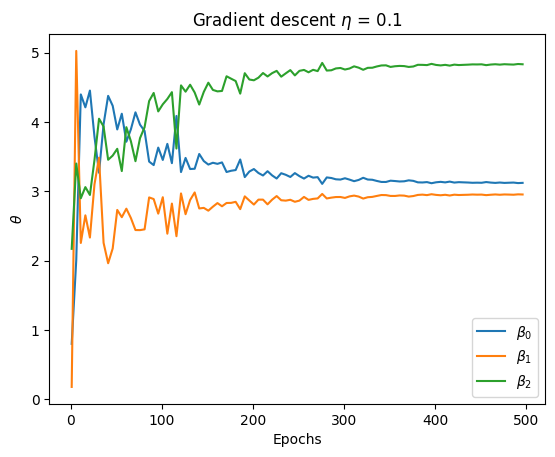

In [207]:
import matplotlib.pyplot as plt

steps = range(1,500,5)

thetas = np.array(
    [gradient_descent(X,y, learning_rate = 0.1, epochs = epoch) for epoch in steps]
)

fig, ax = plt.figure(), plt.axes()
ax.plot(steps, thetas, label = [r"$\beta_0$", r"$\beta_1$", r"$\beta_2$"])
ax.set(title = r"Gradient descent $\eta$ = 0.1", xlabel="Epochs", ylabel=r"$\theta$")
ax.legend()

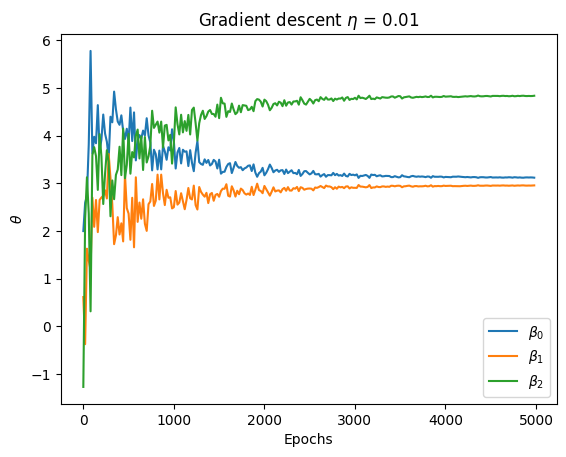

In [209]:
steps = range(1,5000,20)

# lower learning rate -> takes more epochs to converge
thetas = np.array(
    [gradient_descent(X,y, learning_rate = 0.01, epochs = epoch) for epoch in steps]
)

fig, ax = plt.figure(), plt.axes()
ax.plot(steps, thetas, label = [r"$\beta_0$", r"$\beta_1$", r"$\beta_2$"])
ax.set(title = r"Gradient descent $\eta$ = 0.01", xlabel="Epochs", ylabel=r"$\theta$")
ax.legend()

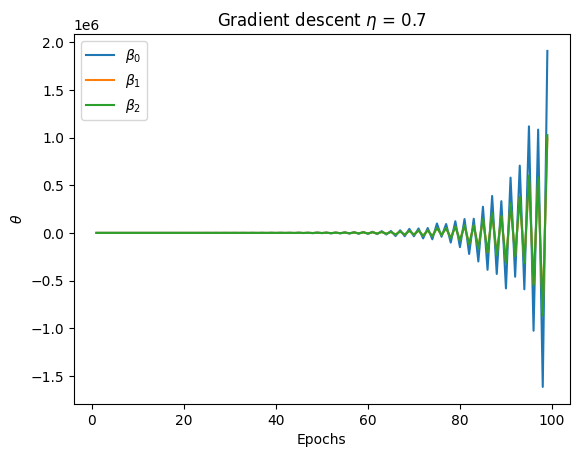

In [225]:
steps = range(1,100,1)

# too high learning rate: diverges instead of converging
thetas = np.array(
    [gradient_descent(X,y, learning_rate = 0.7, epochs = epoch) for epoch in steps]
)

fig, ax = plt.figure(), plt.axes()
ax.plot(steps, thetas, label = [r"$\beta_0$", r"$\beta_1$", r"$\beta_2$"])
ax.set(title = r"Gradient descent $\eta$ = 0.7", xlabel="Epochs", ylabel=r"$\theta$")
ax.legend()

# 2. Stochastic gradient descent